<a href="https://colab.research.google.com/github/zuzanadostalova/Tutorials/blob/master/Best_prediction_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST dataset.

Dense layer: A linear operation in which every input is connected to every output by a weight (n_outputs weights). 

Followed by a non-linear activation function (ReLU).

Convolutional layer: A linear operation using a subset of the weights of a dense layer. Nearby inputs are connected to nearby outputs (specifically -     - a convolution 755). The weights for the convolutions at each location are shared. Due to the weight sharing there’s far less weights than in a dense layer. Generally followed by a non-linear activation function.

Pooling layer: Replaces each patch in the input with a single output, which is the maximum (can also be average) of the input patch.

Normalization layer: Scale the input so that the output has near to a zero mean and unit standard deviation, to allow for faster and more resilient training.

If you change the architecture of your model, restart the runtime. Otherwise, you are running the old architecture.

> I. Import tensorflow and helper libraries.

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Print a version of tensorflow.
print(tf.__version__)

2.2.0-rc2


> II. Import MNIST dataset.

In [0]:
# Loading the dataset returns four Numpy arrays.
# Imagaes are 28x28 NumPy arrays, pixels 0-255, labels are an array of integers
# 0-9.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

> III. Class names are not included in the dataset, add them for later use when plotting images.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

> IV. Format of the dataset:

In [20]:
# There are 60000 images in the training set represented as 28x28 pixels.
train_images.shape

(60000, 28, 28)

In [21]:
# There are 60000 labels in the training set.
len(train_labels)

60000

In [22]:
# Each label is an integer 0-9.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
# In the test set, there are 10000  represented as 28x28 pixels.
test_images.shape

(10000, 28, 28)

In [24]:
# There are 10000 labels in the training set.
len(test_labels)

10000

In [25]:
# Each label is an integer 0-9.
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

> V. Data preprocessing:

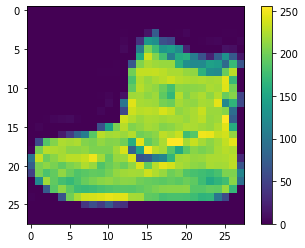

In [26]:
# The first image in the training set is repsented by 0-255 pixels, however,
# that cannot be input for your model.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

> VI. Scale them to a range of 0 to 1 before loading them to the neural network model.

In [0]:
# Training and testing set have to be preprocessed in the same way.
train_images = train_images / 255
test_images = test_images / 255

> VII. To verify the data before building NN, display the first 25 images.

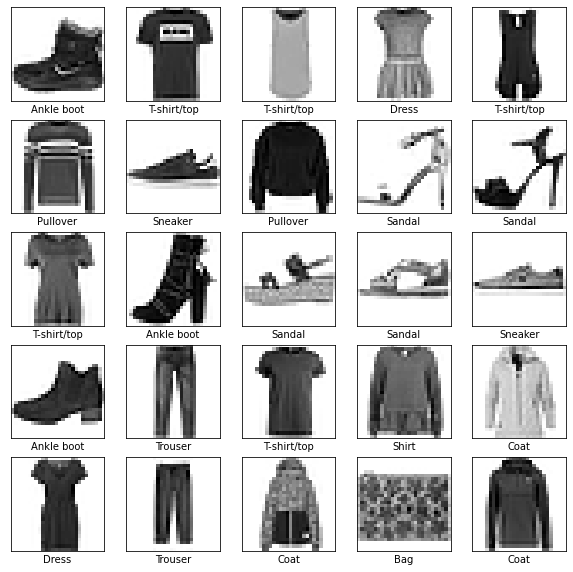

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

> VIII. Resize the training and testing images feed them in the convolution layer.

In [29]:
# Take all of the 60000 images, 28x28 pixels, one column.
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)
input_shape = (28,28,1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print('x_train shape:', train_images.shape)
print('Number of images in x_train', train_images.shape[0])
print('Number of images in x_test', test_images.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Model building.

I. Set up the layers.

In [0]:
from keras.layers.normalization import BatchNormalization

model = keras.Sequential([
                         keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None),
                        # Flatten layer is unstacking rows of pixels in the 
                        # image and lining them up - 784 pixels. 
                         keras.layers.Flatten(),
                        # The first Dense layer has 128 nodes (or neurons). 
                        # The second (and last) layer returns a logits array 
                        # with length of 10. Each node contains a score indicating
                        # the current image belongs to one of the 10 classes.
                        # Dense = fully connected layer.

                        # The more neurons you have, the more features they
                        # can recognise.

                        # 2 Dense layers with ReLU - test accuracy: 0.8843
                        
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.GaussianDropout(0.2),
                         keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.GaussianDropout(0.2),
                         keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                         keras.layers.Dense(64, activation='relu'),
                         keras.layers.GaussianDropout(0.2),
                         keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                         keras.layers.Dense(32, activation='relu'),
                         keras.layers.GaussianDropout(0.2),
                         keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                         keras.layers.Dense(16, activation='relu'),
                         keras.layers.GaussianDropout(0.2),
                         keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None),
                        # 3 Dense layers - Test accuracy 0.8817999958992004
                         keras.layers.Dense(10) 
])

II. Compile the model.

In [0]:
# Loss function —This measures how accurate the model is during training. 
# You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its 
# loss function.
# Metrics —Used to monitor the training and testing steps. The following example 
# uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

III. Train the model.

A) Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

In [32]:
model.fit(train_images, train_labels, epochs=18)

Epoch 1/18
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9168 - accuracy: 0.7002
Epoch 2/18
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6463 - accuracy: 0.7911
Epoch 3/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6073 - accuracy: 0.8061
Epoch 4/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5591 - accuracy: 0.8197
Epoch 5/18
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5362 - accuracy: 0.8259
Epoch 6/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5067 - accuracy: 0.8364
Epoch 7/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4880 - accuracy: 0.8429
Epoch 8/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4836 - accuracy: 0.8438
Epoch 9/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4755 - accuracy: 0.8450
Epoch 10/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.456

B) Evaluate accuracy of the model on test dataset.

In [33]:
# verbose=2 will just mention the number of epoch.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

# It turns out that the accuracy on the test dataset is a little less than 
# the accuracy on the training dataset. This gap between training accuracy 
# and test accuracy represents overfitting. Overfitting happens when 
# a machine learning model performs worse on new, previously unseen inputs 
# than it does on the training data. An overfitted model "memorizes" the noise 
# and details in the training dataset to a point where it negatively impacts
# the performance of the model on the new data.

313/313 - 1s - loss: 0.3502 - accuracy: 0.8810

Test accuracy 0.8809999823570251


C) Make predictions.

In [0]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [36]:
# Array of 10 numbers representing the confidence that the image corresponds
# the 10 different articles of clothing.
predictions[0]

array([9.4479823e-05, 2.3855206e-05, 2.4223616e-05, 2.8514101e-05,
       1.3275282e-05, 2.3506263e-03, 3.5239711e-05, 1.0166198e-02,
       3.0531837e-06, 9.8726058e-01], dtype=float32)

In [37]:
# Which label has the highest confidence?
np.argmax(predictions[0])
# This label is for ankle boot, or class_names[9].

9

In [38]:
# Check if the model is correct.
test_labels[0]

9

Build a graph to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape((28,28)), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions about some images.

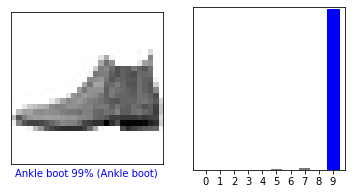

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

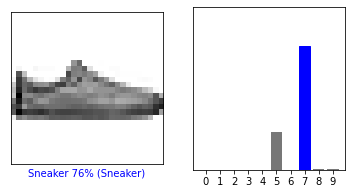

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

Plot images with their predictions.

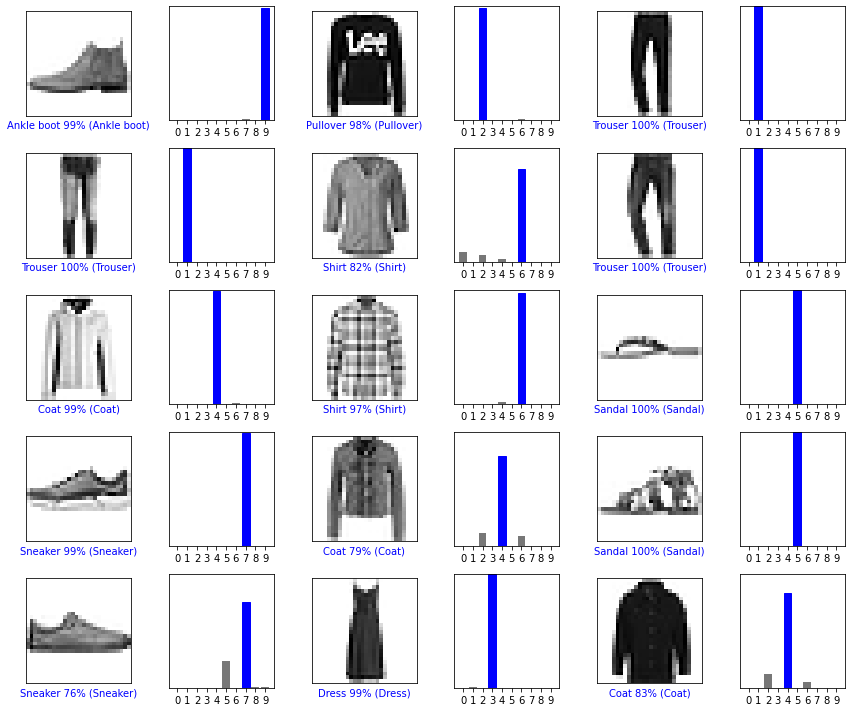

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use trained model to predict a single image.

In [43]:
img = test_images[1]
print(img.shape)

(28, 28, 1)


In [44]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28, 1)


In [45]:
# Predict the correct label for the image.
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.7257916e-03 1.6813261e-05 9.8258740e-01 2.7589002e-04 3.6806583e-03
  8.6742006e-08 1.1673338e-02 5.8841374e-06 2.4890605e-05 9.3209183e-06]]


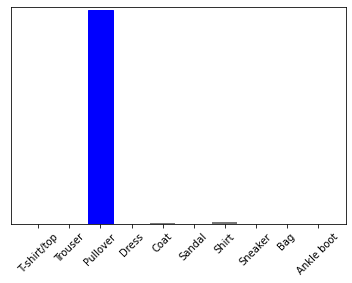

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
# Returns a list of lists—one list for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])

2